<a href="https://colab.research.google.com/github/mingeunjo/mini_game/blob/main/%EC%83%88%EB%A7%8C%EA%B8%88_%EA%B3%B5%EA%B3%B5%EB%8D%B0%EC%9D%B4%ED%84%B0_%EA%B3%B5%EB%AA%A8%EC%A0%84_%EB%B6%84%EC%84%9D_%EC%A0%9C%EC%B6%9C%EC%9A%A9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
# 구글 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [48]:
!pip install koreanize-matplotlib

In [49]:
# 라이브러리 불러오기
import pandas as pd
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report # 혼동행렬 설치 프로그램

from sklearn.metrics.pairwise import cosine_similarity # 코사인 유사도 측정하는 코드  - 협업도
# 딥러닝
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
# 한글 폰트
import koreanize_matplotlib

In [50]:
# 1. 나눔 폰트 설치
!sudo apt-get install -y fonts-nanum

# 2. 폰트 캐시 재생성
!sudo fc-cache -fv

# 3. matplotlib 캐시 삭제
!rm ~/.cache/matplotlib -rf

print("설치 완료! ctrl + M .")

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [51]:
# 코랩 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic')
plt.rc('axes', unicode_minus=False)

In [52]:
data_dongjin = pd.read_csv('/content/dongjin.csv')

In [53]:
data_garyeok = pd.read_csv('/content/garyeok.csv')

In [54]:
data_garyeok = pd.read_csv('/content/garyeok.csv')

In [55]:

# 결과 확인 (처음과 끝 부분)
print("데이터프레임의 처음 부분:")
display(data_dongjin.head())

print("\n데이터프레임의 끝 부분:")
display(data_dongjin.tail())

데이터프레임의 처음 부분:


,년,월,일,00분,10분,20분,30분,40분,50분,시간 최대,시간 최소,시간 평균
0,2021,6,1,88.44,88.41,88.44,88.41,88.45,88.47,88.47,88.41,88.436667
1,2021,6,2,89.33,89.30,89.28,89.33,89.40,89.40,89.40,89.28,89.340000
2,2021,6,3,90.95,90.97,91.06,91.06,91.19,91.11,91.19,90.95,91.056667
3,2021,6,4,95.37,95.37,95.41,95.41,95.34,95.31,95.41,95.31,95.368333
4,2021,6,5,96.63,96.66,96.67,96.68,96.67,96.71,96.71,96.63,96.670000



데이터프레임의 끝 부분:


,년,월,일,00분,10분,20분,30분,40분,50분,시간 최대,시간 최소,시간 평균
483,2024,9,26,100.274,100.041,100.210,100.279,100.237,100.198,100.468,99.741,100.199
484,2024,9,27,100.862,100.878,100.852,100.910,101.013,100.890,101.217,100.448,100.889
485,2024,9,28,100.876,100.955,100.841,100.764,100.880,100.999,101.147,100.495,100.876
486,2024,9,29,100.057,100.996,100.257,100.987,100.296,101.057,101.245,98.270,100.601
487,2024,9,30,101.393,101.360,100.589,101.246,101.304,100.412,101.610,99.391,101.042


In [56]:
data_dongjin

,년,월,일,00분,10분,20분,30분,40분,50분,시간 최대,시간 최소,시간 평균
0,2021,6,1,88.440,88.410,88.440,88.410,88.450,88.470,88.470,88.410,88.436667
1,2021,6,2,89.330,89.300,89.280,89.330,89.400,89.400,89.400,89.280,89.340000
2,2021,6,3,90.950,90.970,91.060,91.060,91.190,91.110,91.190,90.950,91.056667
3,2021,6,4,95.370,95.370,95.410,95.410,95.340,95.310,95.410,95.310,95.368333
4,2021,6,5,96.630,96.660,96.670,96.680,96.670,96.710,96.710,96.630,96.670000
...,...,...,...,...,...,...,...,...,...,...,...,...
483,2024,9,26,100.274,100.041,100.210,100.279,100.237,100.198,100.468,99.741,100.199000
484,2024,9,27,100.862,100.878,100.852,100.910,101.013,100.890,101.217,100.448,100.889000
485,2024,9,28,100.876,100.955,100.841,100.764,100.880,100.999,101.147,100.495,100.876000
486,2024,9,29,100.057,100.996,100.257,100.987,100.296,101.057,101.245,98.270,100.601000


In [57]:
# '시간 최대', '시간 최소', '시간 평균' 컬럼에서 0.000 값을 가진 행 찾기
zero_mask_max = data_dongjin['시간 최대'] == 0.000
zero_mask_min = data_dongjin['시간 최소'] == 0.000
zero_mask_mean = data_dongjin['시간 평균'] == 0.000

# 00분부터 50분까지의 컬럼 이름 리스트
minute_cols = [f'{i:02d}분' for i in range(0, 60, 10)]

# 0.000 값을 가진 행에 대해 '00분'~'50분' 컬럼을 이용하여 다시 계산하여 채우기
if zero_mask_max.any():
    data_dongjin.loc[zero_mask_max, '시간 최대'] = data_dongjin.loc[zero_mask_max, minute_cols].max(axis=1)

if zero_mask_min.any():
    data_dongjin.loc[zero_mask_min, '시간 최소'] = data_dongjin.loc[zero_mask_min, minute_cols].min(axis=1)

if zero_mask_mean.any():
    data_dongjin.loc[zero_mask_mean, '시간 평균'] = data_dongjin.loc[zero_mask_mean, minute_cols].mean(axis=1)

# 결과 확인 (처음 부분을 확인하여 0.000 값이 대체되었는지 확인)
data_dongjin

,년,월,일,00분,10분,20분,30분,40분,50분,시간 최대,시간 최소,시간 평균
0,2021,6,1,88.440,88.410,88.440,88.410,88.450,88.470,88.470,88.410,88.436667
1,2021,6,2,89.330,89.300,89.280,89.330,89.400,89.400,89.400,89.280,89.340000
2,2021,6,3,90.950,90.970,91.060,91.060,91.190,91.110,91.190,90.950,91.056667
3,2021,6,4,95.370,95.370,95.410,95.410,95.340,95.310,95.410,95.310,95.368333
4,2021,6,5,96.630,96.660,96.670,96.680,96.670,96.710,96.710,96.630,96.670000
...,...,...,...,...,...,...,...,...,...,...,...,...
483,2024,9,26,100.274,100.041,100.210,100.279,100.237,100.198,100.468,99.741,100.199000
484,2024,9,27,100.862,100.878,100.852,100.910,101.013,100.890,101.217,100.448,100.889000
485,2024,9,28,100.876,100.955,100.841,100.764,100.880,100.999,101.147,100.495,100.876000
486,2024,9,29,100.057,100.996,100.257,100.987,100.296,101.057,101.245,98.270,100.601000


In [58]:
# 6월, 7월, 8월, 9월 데이터만 필터링
data_dongjin = data_dongjin[data_dongjin['월'].isin([6, 7, 8, 9])]

# 결과 확인
data_dongjin

,년,월,일,00분,10분,20분,30분,40분,50분,시간 최대,시간 최소,시간 평균
0,2021,6,1,88.440,88.410,88.440,88.410,88.450,88.470,88.470,88.410,88.436667
1,2021,6,2,89.330,89.300,89.280,89.330,89.400,89.400,89.400,89.280,89.340000
2,2021,6,3,90.950,90.970,91.060,91.060,91.190,91.110,91.190,90.950,91.056667
3,2021,6,4,95.370,95.370,95.410,95.410,95.340,95.310,95.410,95.310,95.368333
4,2021,6,5,96.630,96.660,96.670,96.680,96.670,96.710,96.710,96.630,96.670000
...,...,...,...,...,...,...,...,...,...,...,...,...
483,2024,9,26,100.274,100.041,100.210,100.279,100.237,100.198,100.468,99.741,100.199000
484,2024,9,27,100.862,100.878,100.852,100.910,101.013,100.890,101.217,100.448,100.889000
485,2024,9,28,100.876,100.955,100.841,100.764,100.880,100.999,101.147,100.495,100.876000
486,2024,9,29,100.057,100.996,100.257,100.987,100.296,101.057,101.245,98.270,100.601000


In [59]:
data_dongjin.to_csv('dongjin.csv', index=False, encoding='utf-8-sig')

In [60]:
data_garyeok

,년,월,일,00분,10분,20분,30분,40분,50분,시간 최대,시간 최소,시간 평균
0,2021,6,1,-42.340,-42.320,-42.280,-42.260,-42.300,-42.260,-42.260,-42.340,-42.293333
1,2021,6,2,-41.570,-41.570,-41.550,-41.530,-41.500,-41.520,-41.500,-41.570,-41.540000
2,2021,6,3,-40.620,-40.800,-40.610,-40.530,-40.560,-40.520,-40.520,-40.800,-40.606667
3,2021,6,4,-38.990,-38.970,-38.980,-38.960,-38.940,-38.930,-38.930,-38.990,-38.961667
4,2021,6,5,-38.480,-38.470,-38.460,-38.940,-38.460,-38.440,-38.440,-38.940,-38.541667
...,...,...,...,...,...,...,...,...,...,...,...,...
483,2024,9,26,-38.768,-38.758,-38.748,-38.751,-38.740,-38.731,-38.693,-38.817,-38.740000
484,2024,9,27,-38.185,-38.396,-38.185,-38.185,-38.185,-38.209,-38.057,-38.521,-38.214000
485,2024,9,28,-37.726,-37.743,-37.735,-37.759,-37.723,-37.939,-37.620,-38.056,-37.761000
486,2024,9,29,-37.472,-37.494,-37.471,-37.455,-37.477,-37.462,-37.365,-37.574,-37.464000


In [61]:
# '년', '월', '일' 별로 그룹화하고 나머지 컬럼의 합계 계산 (데이터셋의 모든 일자에 대해 수행)
data_garyeok = data_garyeok.groupby(['년', '월', '일']).sum().reset_index()

In [62]:
# 결과 확인 (처음과 끝 부분)
print("데이터프레임의 처음 부분:")
display(data_garyeok.head())

print("\n데이터프레임의 끝 부분:")
display(data_garyeok.tail())

데이터프레임의 처음 부분:


,년,월,일,00분,10분,20분,30분,40분,50분,시간 최대,시간 최소,시간 평균
0,2021,6,1,-42.34,-42.32,-42.28,-42.26,-42.30,-42.26,-42.26,-42.34,-42.293333
1,2021,6,2,-41.57,-41.57,-41.55,-41.53,-41.50,-41.52,-41.50,-41.57,-41.540000
2,2021,6,3,-40.62,-40.80,-40.61,-40.53,-40.56,-40.52,-40.52,-40.80,-40.606667
3,2021,6,4,-38.99,-38.97,-38.98,-38.96,-38.94,-38.93,-38.93,-38.99,-38.961667
4,2021,6,5,-38.48,-38.47,-38.46,-38.94,-38.46,-38.44,-38.44,-38.94,-38.541667



데이터프레임의 끝 부분:


,년,월,일,00분,10분,20분,30분,40분,50분,시간 최대,시간 최소,시간 평균
483,2024,9,26,-38.768,-38.758,-38.748,-38.751,-38.740,-38.731,-38.693,-38.817,-38.740
484,2024,9,27,-38.185,-38.396,-38.185,-38.185,-38.185,-38.209,-38.057,-38.521,-38.214
485,2024,9,28,-37.726,-37.743,-37.735,-37.759,-37.723,-37.939,-37.620,-38.056,-37.761
486,2024,9,29,-37.472,-37.494,-37.471,-37.455,-37.477,-37.462,-37.365,-37.574,-37.464
487,2024,9,30,-37.471,-37.465,-37.469,-37.432,-37.442,-37.421,-37.245,-37.648,-37.438


In [63]:
# 변수 값 바꿔주기
# '시간 최대', '시간 최소', '시간 평균' 컬럼에서 0.000 값을 가진 행 찾기
one_mask_max = data_garyeok['시간 최대'] == 0.000
one_mask_min = data_garyeok['시간 최소'] == 0.000
one_mask_mean = data_garyeok['시간 평균'] == 0.000

# 00분부터 50분까지의 컬럼 이름 리스트
minute_cols = [f'{i:02d}분' for i in range(0, 60, 10)]

# 0.000 값을 가진 행에 대해 '00분'~'50분' 컬럼을 이용하여 다시 계산하여 채우기
if one_mask_max.any():
    data_garyeok.loc[one_mask_max, '시간 최대'] = data_garyeok.loc[one_mask_max, minute_cols].max(axis=1)

if zero_mask_min.any():
    data_garyeok.loc[one_mask_min, '시간 최소'] = data_garyeok.loc[one_mask_min, minute_cols].min(axis=1)

if zero_mask_mean.any():
    data_garyeok.loc[one_mask_mean, '시간 평균'] = data_garyeok.loc[one_mask_mean, minute_cols].mean(axis=1)

# 결과 확인 (처음 부분을 확인하여 0.000 값이 대체되었는지 확인)
data_garyeok

,년,월,일,00분,10분,20분,30분,40분,50분,시간 최대,시간 최소,시간 평균
0,2021,6,1,-42.340,-42.320,-42.280,-42.260,-42.300,-42.260,-42.260,-42.340,-42.293333
1,2021,6,2,-41.570,-41.570,-41.550,-41.530,-41.500,-41.520,-41.500,-41.570,-41.540000
2,2021,6,3,-40.620,-40.800,-40.610,-40.530,-40.560,-40.520,-40.520,-40.800,-40.606667
3,2021,6,4,-38.990,-38.970,-38.980,-38.960,-38.940,-38.930,-38.930,-38.990,-38.961667
4,2021,6,5,-38.480,-38.470,-38.460,-38.940,-38.460,-38.440,-38.440,-38.940,-38.541667
...,...,...,...,...,...,...,...,...,...,...,...,...
483,2024,9,26,-38.768,-38.758,-38.748,-38.751,-38.740,-38.731,-38.693,-38.817,-38.740000
484,2024,9,27,-38.185,-38.396,-38.185,-38.185,-38.185,-38.209,-38.057,-38.521,-38.214000
485,2024,9,28,-37.726,-37.743,-37.735,-37.759,-37.723,-37.939,-37.620,-38.056,-37.761000
486,2024,9,29,-37.472,-37.494,-37.471,-37.455,-37.477,-37.462,-37.365,-37.574,-37.464000


In [64]:
# 6월, 7월, 8월, 9월 데이터만 필터링
data_garyeok = data_garyeok[data_garyeok['월'].isin([6, 7, 8, 9])]

# 결과 확인
data_garyeok

,년,월,일,00분,10분,20분,30분,40분,50분,시간 최대,시간 최소,시간 평균
0,2021,6,1,-42.340,-42.320,-42.280,-42.260,-42.300,-42.260,-42.260,-42.340,-42.293333
1,2021,6,2,-41.570,-41.570,-41.550,-41.530,-41.500,-41.520,-41.500,-41.570,-41.540000
2,2021,6,3,-40.620,-40.800,-40.610,-40.530,-40.560,-40.520,-40.520,-40.800,-40.606667
3,2021,6,4,-38.990,-38.970,-38.980,-38.960,-38.940,-38.930,-38.930,-38.990,-38.961667
4,2021,6,5,-38.480,-38.470,-38.460,-38.940,-38.460,-38.440,-38.440,-38.940,-38.541667
...,...,...,...,...,...,...,...,...,...,...,...,...
483,2024,9,26,-38.768,-38.758,-38.748,-38.751,-38.740,-38.731,-38.693,-38.817,-38.740000
484,2024,9,27,-38.185,-38.396,-38.185,-38.185,-38.185,-38.209,-38.057,-38.521,-38.214000
485,2024,9,28,-37.726,-37.743,-37.735,-37.759,-37.723,-37.939,-37.620,-38.056,-37.761000
486,2024,9,29,-37.472,-37.494,-37.471,-37.455,-37.477,-37.462,-37.365,-37.574,-37.464000


In [65]:
data_sinsido = pd.read_csv('/content/sinsido.csv')

In [66]:
data_sinsido

,년,월,일,00분,10분,20분,30분,40분,50분,시간 최대,시간 최소,시간 평균
0,2021,6,1,0.000,-41.490,-41.470,-41.460,-41.490,-41.440,0.000,-41.490,-34.558333
1,2021,6,2,0.000,-40.790,-40.760,-40.790,-40.740,-40.750,0.000,-40.790,-33.971667
2,2021,6,3,0.000,-39.830,-39.860,-39.860,-39.870,-39.780,0.000,-39.870,-33.200000
3,2021,6,4,0.000,-38.220,-38.200,-38.190,-38.190,-38.160,0.000,-38.220,-31.826667
4,2021,6,5,0.000,-37.440,-37.380,-37.420,-37.350,-37.370,0.000,-37.440,-31.160000
...,...,...,...,...,...,...,...,...,...,...,...,...
483,2024,9,26,-38.669,-38.680,-38.678,-38.655,-38.640,-39.018,-38.589,-39.096,-38.710000
484,2024,9,27,-38.242,-38.254,-38.442,-38.247,-38.251,-38.233,-38.167,-38.500,-38.268000
485,2024,9,28,-37.468,-37.482,-37.473,-37.468,-37.465,-37.436,-37.375,-37.551,-37.455000
486,2024,9,29,-37.198,-37.185,-37.195,-37.210,-37.215,-37.210,-37.128,-37.275,-37.194000


In [67]:
# 변수 값 바꿔주기
# '시간 최대', '시간 최소', '시간 평균' 컬럼에서 0.000 값을 가진 행 찾기
two_mask_max = data_sinsido['시간 최대'] == 0.000
two_mask_min = data_sinsido['시간 최소'] == 0.000
two_mask_mean = data_sinsido['시간 평균'] == 0.000

# 00분부터 50분까지의 컬럼 이름 리스트
minute_cols = [f'{i:02d}분' for i in range(0, 60, 10)]

# 0.000 값을 가진 행에 대해 '00분'~'50분' 컬럼을 이용하여 다시 계산하여 채우기
if two_mask_max.any():
    data_sinsido.loc[two_mask_max, '시간 최대'] = data_sinsido.loc[two_mask_max, minute_cols].max(axis=1)

if zero_mask_min.any():
    data_sinsido.loc[two_mask_min, '시간 최소'] = data_sinsido.loc[two_mask_min, minute_cols].min(axis=1)

if zero_mask_mean.any():
    data_sinsido.loc[two_mask_mean, '시간 평균'] = data_sinsido.loc[two_mask_mean, minute_cols].mean(axis=1)

# 결과 확인 (처음 부분을 확인하여 0.000 값이 대체되었는지 확인)
data_sinsido

,년,월,일,00분,10분,20분,30분,40분,50분,시간 최대,시간 최소,시간 평균
0,2021,6,1,0.000,-41.490,-41.470,-41.460,-41.490,-41.440,0.000,-41.490,-34.558333
1,2021,6,2,0.000,-40.790,-40.760,-40.790,-40.740,-40.750,0.000,-40.790,-33.971667
2,2021,6,3,0.000,-39.830,-39.860,-39.860,-39.870,-39.780,0.000,-39.870,-33.200000
3,2021,6,4,0.000,-38.220,-38.200,-38.190,-38.190,-38.160,0.000,-38.220,-31.826667
4,2021,6,5,0.000,-37.440,-37.380,-37.420,-37.350,-37.370,0.000,-37.440,-31.160000
...,...,...,...,...,...,...,...,...,...,...,...,...
483,2024,9,26,-38.669,-38.680,-38.678,-38.655,-38.640,-39.018,-38.589,-39.096,-38.710000
484,2024,9,27,-38.242,-38.254,-38.442,-38.247,-38.251,-38.233,-38.167,-38.500,-38.268000
485,2024,9,28,-37.468,-37.482,-37.473,-37.468,-37.465,-37.436,-37.375,-37.551,-37.455000
486,2024,9,29,-37.198,-37.185,-37.195,-37.210,-37.215,-37.210,-37.128,-37.275,-37.194000


In [68]:
# 6월, 7월, 8월, 9월 데이터만 필터링
data_sinsido = data_sinsido[data_sinsido['월'].isin([6, 7, 8, 9])]

# 결과 확인
data_sinsido

,년,월,일,00분,10분,20분,30분,40분,50분,시간 최대,시간 최소,시간 평균
0,2021,6,1,0.000,-41.490,-41.470,-41.460,-41.490,-41.440,0.000,-41.490,-34.558333
1,2021,6,2,0.000,-40.790,-40.760,-40.790,-40.740,-40.750,0.000,-40.790,-33.971667
2,2021,6,3,0.000,-39.830,-39.860,-39.860,-39.870,-39.780,0.000,-39.870,-33.200000
3,2021,6,4,0.000,-38.220,-38.200,-38.190,-38.190,-38.160,0.000,-38.220,-31.826667
4,2021,6,5,0.000,-37.440,-37.380,-37.420,-37.350,-37.370,0.000,-37.440,-31.160000
...,...,...,...,...,...,...,...,...,...,...,...,...
483,2024,9,26,-38.669,-38.680,-38.678,-38.655,-38.640,-39.018,-38.589,-39.096,-38.710000
484,2024,9,27,-38.242,-38.254,-38.442,-38.247,-38.251,-38.233,-38.167,-38.500,-38.268000
485,2024,9,28,-37.468,-37.482,-37.473,-37.468,-37.465,-37.436,-37.375,-37.551,-37.455000
486,2024,9,29,-37.198,-37.185,-37.195,-37.210,-37.215,-37.210,-37.128,-37.275,-37.194000


# 첫번째 예측 데이터 구성하기!

In [69]:
# 데이터셋 불러오기
data_dongjin = pd.read_csv('dongjin.csv')
data_garyeok = pd.read_csv('garyeok.csv')
data_sinsido = pd.read_csv('sinsido.csv')

# 센서 위치 컬럼 추가
data_dongjin['sensor_location'] = 'dongjin'
data_garyeok['sensor_location'] = 'garyeok'
data_sinsido['sensor_location'] = 'sinsido'

# 동진 센서용 datetime 컬럼 생성
data_dongjin['datetime'] = pd.to_datetime(data_dongjin[['년', '월', '일']].astype(str).agg('-'.join, axis=1))

# 가력 센서용 datetime 컬럼 생성
data_garyeok['datetime'] = pd.to_datetime(data_garyeok[['년', '월', '일']].astype(str).agg('-'.join, axis=1))

# 신시도 센서용 datetime 컬럼 생성
data_sinsido['datetime'] = pd.to_datetime(data_sinsido[['년', '월', '일']].astype(str).agg('-'.join, axis=1))

# 세 개의 데이터프레임을 병합
merged_data = pd.concat([data_dongjin, data_garyeok, data_sinsido], ignore_index=True)

# 병합된 데이터 앞부분과 뒷부분 출력
display(merged_data.head())
display(merged_data.tail())


,년,월,일,00분,10분,20분,30분,40분,50분,시간 최대,시간 최소,시간 평균,sensor_location,datetime
0,2021,6,1,88.44,88.41,88.44,88.41,88.45,88.47,88.47,88.41,88.436667,dongjin,2021-06-01
1,2021,6,2,89.33,89.30,89.28,89.33,89.40,89.40,89.40,89.28,89.340000,dongjin,2021-06-02
2,2021,6,3,90.95,90.97,91.06,91.06,91.19,91.11,91.19,90.95,91.056667,dongjin,2021-06-03
3,2021,6,4,95.37,95.37,95.41,95.41,95.34,95.31,95.41,95.31,95.368333,dongjin,2021-06-04
4,2021,6,5,96.63,96.66,96.67,96.68,96.67,96.71,96.71,96.63,96.670000,dongjin,2021-06-05


,년,월,일,00분,10분,20분,30분,40분,50분,시간 최대,시간 최소,시간 평균,sensor_location,datetime
1459,2024,9,26,-38.669,-38.680,-38.678,-38.655,-38.640,-39.018,-38.589,-39.096,-38.710,sinsido,2024-09-26
1460,2024,9,27,-38.242,-38.254,-38.442,-38.247,-38.251,-38.233,-38.167,-38.500,-38.268,sinsido,2024-09-27
1461,2024,9,28,-37.468,-37.482,-37.473,-37.468,-37.465,-37.436,-37.375,-37.551,-37.455,sinsido,2024-09-28
1462,2024,9,29,-37.198,-37.185,-37.195,-37.210,-37.215,-37.210,-37.128,-37.275,-37.194,sinsido,2024-09-29
1463,2024,9,30,-37.887,-37.949,-38.022,-38.055,-38.030,-37.916,-37.612,-38.209,-37.966,sinsido,2024-09-30


In [70]:
# 각 센서 위치별로 수위 변화량(이전 시간과의 차이) 계산
merged_data['water_level_change'] = merged_data.groupby('sensor_location')['시간 평균'].diff()

# 새로운 특성(water_level_change)이 추가된 데이터 표시
display(merged_data.head())
display(merged_data.tail())


,년,월,일,00분,10분,20분,30분,40분,50분,시간 최대,시간 최소,시간 평균,sensor_location,datetime,water_level_change
0,2021,6,1,88.44,88.41,88.44,88.41,88.45,88.47,88.47,88.41,88.436667,dongjin,2021-06-01,NaN
1,2021,6,2,89.33,89.30,89.28,89.33,89.40,89.40,89.40,89.28,89.340000,dongjin,2021-06-02,0.903333
2,2021,6,3,90.95,90.97,91.06,91.06,91.19,91.11,91.19,90.95,91.056667,dongjin,2021-06-03,1.716667
3,2021,6,4,95.37,95.37,95.41,95.41,95.34,95.31,95.41,95.31,95.368333,dongjin,2021-06-04,4.311667
4,2021,6,5,96.63,96.66,96.67,96.68,96.67,96.71,96.71,96.63,96.670000,dongjin,2021-06-05,1.301667


,년,월,일,00분,10분,20분,30분,40분,50분,시간 최대,시간 최소,시간 평균,sensor_location,datetime,water_level_change
1459,2024,9,26,-38.669,-38.680,-38.678,-38.655,-38.640,-39.018,-38.589,-39.096,-38.710,sinsido,2024-09-26,0.576
1460,2024,9,27,-38.242,-38.254,-38.442,-38.247,-38.251,-38.233,-38.167,-38.500,-38.268,sinsido,2024-09-27,0.442
1461,2024,9,28,-37.468,-37.482,-37.473,-37.468,-37.465,-37.436,-37.375,-37.551,-37.455,sinsido,2024-09-28,0.813
1462,2024,9,29,-37.198,-37.185,-37.195,-37.210,-37.215,-37.210,-37.128,-37.275,-37.194,sinsido,2024-09-29,0.261
1463,2024,9,30,-37.887,-37.949,-38.022,-38.055,-38.030,-37.916,-37.612,-38.209,-37.966,sinsido,2024-09-30,-0.772


In [71]:
# 임계값 정의 (예시 값이며 실제 데이터 및 전문가 지식 기반으로 조정 필요)
# 동진 지역의 최대 수위 임계값 설정 (단위: m)
# 가력, 신시도에 대해서도 적절한 임계값 설정이 필요
# 여기서는 예시로 placeholder 값을 사용
threshold_max_water_level_dongjin = 102  # 동진 지역 수위 임계값 (예시)

# 급격한 수위 변화 임계값 설정 (예: 10분 내 0.5m 상승)
threshold_rapid_change = 0.5

# 위험 지역 추정을 위한 시설 거리 및 용량 임계값
threshold_facility_distance = 1000  # 거리 기준 (미터)
threshold_facility_capacity = 1000  # 용량 기준 (㎥/일)

# 홍수 위험 라벨 컬럼(flood_risk_label)을 0으로 초기화
merged_data['flood_risk_label'] = 0

# 조건 적용을 통해 홍수 위험 라벨 지정

# 조건 1: 최대 수위가 임계값 초과 (동진 지역 기준)
# 가력과 신시도도 별도 임계값 설정 필요
merged_data.loc[
    (merged_data['sensor_location'] == 'dongjin') &
    (merged_data['시간 최대'] >= threshold_max_water_level_dongjin),
    'flood_risk_label'
] = 1

# 조건 2: 수위 변화량이 급격한 경우 (0.5m 이상)
merged_data.loc[
    merged_data['water_level_change'] >= threshold_rapid_change,
    'flood_risk_label'
] = 1

# 조건 3: 시설 거리와 용량 기준에 따른 위험 지역 추정
# 해당 조건을 적용하려면 merged_data에 'facility_distance'와 'facility_capacity' 컬럼이 존재해야 함
if 'facility_distance' in merged_data.columns and 'facility_capacity' in merged_data.columns:
    merged_data.loc[
        (merged_data['facility_distance'] >= threshold_facility_distance) &
        (merged_data['facility_capacity'] <= threshold_facility_capacity),
        'flood_risk_label'
    ] = 1
else:
    print("경고: 'facility_distance' 또는 'facility_capacity' 컬럼이 존재하지 않아 조건 3을 건너뜁니다.")

# 결과 확인 (홍수 위험 라벨 포함된 데이터)
display(merged_data.head())
display(merged_data.tail())


경고: 'facility_distance' 또는 'facility_capacity' 컬럼이 존재하지 않아 조건 3을 건너뜁니다.


,년,월,일,00분,10분,20분,30분,40분,50분,시간 최대,시간 최소,시간 평균,sensor_location,datetime,water_level_change,flood_risk_label
0,2021,6,1,88.44,88.41,88.44,88.41,88.45,88.47,88.47,88.41,88.436667,dongjin,2021-06-01,NaN,0
1,2021,6,2,89.33,89.30,89.28,89.33,89.40,89.40,89.40,89.28,89.340000,dongjin,2021-06-02,0.903333,1
2,2021,6,3,90.95,90.97,91.06,91.06,91.19,91.11,91.19,90.95,91.056667,dongjin,2021-06-03,1.716667,1
3,2021,6,4,95.37,95.37,95.41,95.41,95.34,95.31,95.41,95.31,95.368333,dongjin,2021-06-04,4.311667,1
4,2021,6,5,96.63,96.66,96.67,96.68,96.67,96.71,96.71,96.63,96.670000,dongjin,2021-06-05,1.301667,1


,년,월,일,00분,10분,20분,30분,40분,50분,시간 최대,시간 최소,시간 평균,sensor_location,datetime,water_level_change,flood_risk_label
1459,2024,9,26,-38.669,-38.680,-38.678,-38.655,-38.640,-39.018,-38.589,-39.096,-38.710,sinsido,2024-09-26,0.576,1
1460,2024,9,27,-38.242,-38.254,-38.442,-38.247,-38.251,-38.233,-38.167,-38.500,-38.268,sinsido,2024-09-27,0.442,0
1461,2024,9,28,-37.468,-37.482,-37.473,-37.468,-37.465,-37.436,-37.375,-37.551,-37.455,sinsido,2024-09-28,0.813,1
1462,2024,9,29,-37.198,-37.185,-37.195,-37.210,-37.215,-37.210,-37.128,-37.275,-37.194,sinsido,2024-09-29,0.261,0
1463,2024,9,30,-37.887,-37.949,-38.022,-38.055,-38.030,-37.916,-37.612,-38.209,-37.966,sinsido,2024-09-30,-0.772,0


작업(Task)
홍수 위험 등급(flood_risk_label)을 예측하는 분류 모델을 학습시키고, 학습된 모델에서 중요한 특성(feature)을 식별합니다.

모델링을 위한 데이터 준비(Prepare data for modeling)
세부 작업(Subtask):

  - 입력 특성(feature)과 타겟 변수(flood_risk_label)를 선택합니다.

  - 특성 값에 존재하는 결측값(missing values)을 처리합니다.

이유(Reasoning):
모델 학습을 위해 적절한 입력 데이터(X)와 타겟(y)을 구성하고, 결측값이 있을 경우 모델의 정확도에 영향을 줄 수 있으므로 이를 사전에 처리해야 합니다.

In [72]:
# 특성(X)과 타겟(y) 정의
# 원본 날짜 컬럼들, datetime, 분 단위 컬럼들, sensor_location은 제외
feature_cols = ['시간 최대', '시간 최소', '시간 평균', 'water_level_change']
target_col = 'flood_risk_label'

X = merged_data[feature_cols]
y = merged_data[target_col]

# 결측값 처리
# water_level_change의 결측값은 각 센서의 첫 번째 행에서 발생하며,
# 평균값으로 채우는 것이 안전함
X['water_level_change'] = X['water_level_change'].fillna(X['water_level_change'].mean())

# 결측값 처리 확인
print("X 내 결측값 (처리 후):")
print(X.isnull().sum())
print("\ny 내 결측값:")
print(y.isnull().sum())


X 내 결측값 (처리 후):
시간 최대                 0
시간 최소                 0
시간 평균                 0
water_level_change    0
dtype: int64

y 내 결측값:
0


/tmp/ipython-input-95308015.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['water_level_change'] = X['water_level_change'].fillna(X['water_level_change'].mean())


데이터 분할(Split data)
세부 작업(Subtask):

  - 데이터를 학습용(train set)과 테스트용(test set)으로 분할합니다.

이유(Reasoning):
모델의 일반화 성능을 평가하기 위해 전체 데이터를 학습 데이터와 테스트 데이터로 나누는 것은 필수적인 절차입니다. 이렇게 해야 과적합(overfitting)을 방지하고, 실제 데이터에 대한 예측력을 검증할 수 있습니다.

In [73]:
from sklearn.model_selection import train_test_split

# 데이터를 학습용과 테스트용으로 분할 (80% 학습, 20% 테스트)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 분할된 데이터셋의 형태 출력
print("X_train 크기:", X_train.shape)
print("X_test 크기:", X_test.shape)
print("y_train 크기:", y_train.shape)
print("y_test 크기:", y_test.shape)


X_train 크기: (1171, 4)
X_test 크기: (293, 4)
y_train 크기: (1171,)
y_test 크기: (293,)


모델 학습 (Train a model)
세부 작업 (Subtask):

  - RandomForestClassifier와 같은 적절한 분류 모델을 선택하고, 학습 데이터를 기반으로 모델을 학습시킵니다.

이유 (Reasoning):
분류 문제(classification problem)이므로 RandomForestClassifier는 다양한 특성 간의 관계를 잘 파악할 수 있는 강력한 앙상블 모델입니다. 트리 기반 모델이기 때문에 특성 중요도(feature importance)도 쉽게 추출할 수 있습니다.
또한 범주형 레이블인 flood_risk_label을 예측하는 데 적합하며, 과적합을 상대적으로 잘 제어합니다.

In [74]:
from sklearn.ensemble import RandomForestClassifier

# 랜덤 포레스트 분류기 객체 생성
# 현재는 기본 하이퍼파라미터 사용, 추후 튜닝 가능
model = RandomForestClassifier(random_state=42)

# 학습 데이터로 모델 학습
model.fit(X_train, y_train)

print("RandomForestClassifier 모델 학습 완료.")


RandomForestClassifier 모델 학습 완료.


모델 평가 (Evaluate the model)
세부 작업 (Subtask):

테스트 데이터를 사용하여 예측 수행

  - 정확도(accuracy), 분류 리포트(classification report), 혼동 행렬(confusion matrix)를 출력하여 성능 평가

이유 (Reasoning):
모델이 실제로 얼마나 잘 예측하는지를 판단하기 위해서는 학습되지 않은 테스트 데이터로 평가해야 합니다. 이때 정확도만으로는 모델의 전반적인 성능을 판단하기 어려울 수 있으므로, 정밀도(precision), 재현율(recall), F1-score 등을 포함한 분류 리포트를 함께 확인합니다.

정확도 (Accuracy): 0.9966

분류 리포트 (Classification Report):
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       136
           1       1.00      0.99      1.00       157

    accuracy                           1.00       293
   macro avg       1.00      1.00      1.00       293
weighted avg       1.00      1.00      1.00       293


정규화된 혼동 행렬:
[[1.         0.        ]
 [0.00636943 0.99363057]]


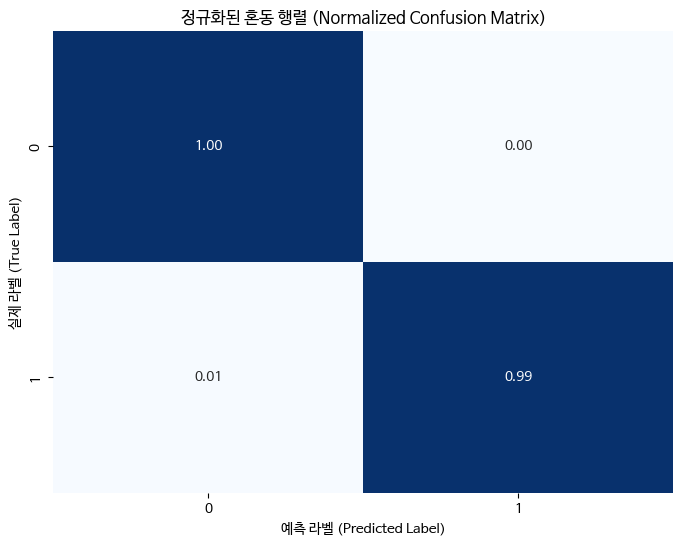


원본 혼동 행렬:
[[136   0]
 [  1 156]]


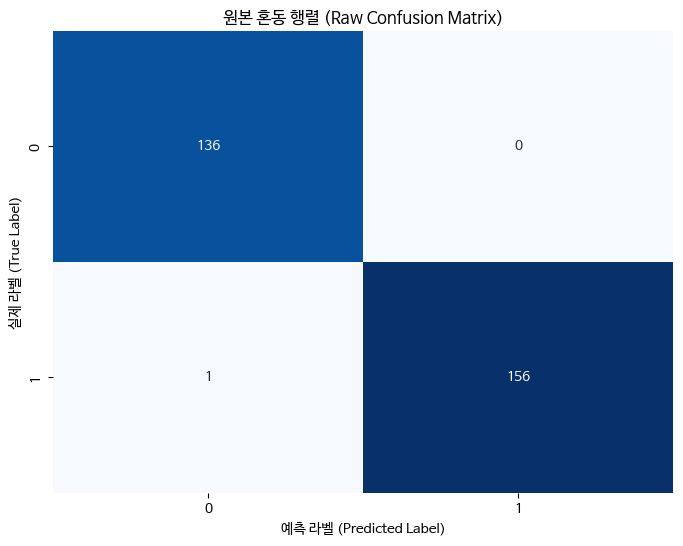

In [75]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# 분류용 특성과 타겟 변수 정의
feature_cols_classification = ['시간 최대', '시간 최소', '시간 평균', 'water_level_change']
target_col_classification = 'flood_risk_label'

# water_level_change가 존재하는지 확인
if 'water_level_change' not in merged_data.columns:
    print("오류: 'water_level_change' 컬럼이 merged_data에 없습니다. 먼저 해당 컬럼을 계산하는 셀을 실행하세요.")
else:
    # 특성과 타겟 데이터 복사
    X_classification = merged_data[feature_cols_classification].copy()
    y_classification = merged_data[target_col_classification].copy()

    # 결측값 평균으로 채우기
    X_classification['water_level_change'] = X_classification['water_level_change'].fillna(
        X_classification['water_level_change'].mean()
    )

    from sklearn.model_selection import train_test_split
    # 데이터 분할 (stratify를 통해 클래스 비율 유지)
    X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(
        X_classification, y_classification, test_size=0.2, random_state=42, stratify=y_classification
    )

    # 학습된 모델로 예측 수행
    y_pred_clf = model.predict(X_test_clf)

    # 정확도 계산 및 출력
    accuracy = accuracy_score(y_test_clf, y_pred_clf)
    print(f"정확도 (Accuracy): {accuracy:.4f}")

    # 분류 리포트 출력 (정밀도, 재현율, F1 등)
    print("\n분류 리포트 (Classification Report):")
    print(classification_report(y_test_clf, y_pred_clf))

    # 정규화된 혼동 행렬 계산
    cm_normalized = confusion_matrix(y_test_clf, y_pred_clf, normalize='true')

    # 정규화된 혼동 행렬 출력
    print("\n정규화된 혼동 행렬:")
    print(cm_normalized)

    # 정규화된 혼동 행렬 시각화
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues', cbar=False)
    plt.xlabel('예측 라벨 (Predicted Label)')
    plt.ylabel('실제 라벨 (True Label)')
    plt.title('정규화된 혼동 행렬 (Normalized Confusion Matrix)')
    plt.show()

    # 원본 혼동 행렬 계산 (정수 카운트)
    cm_raw = confusion_matrix(y_test_clf, y_pred_clf)

    # 원본 혼동 행렬 출력
    print("\n원본 혼동 행렬:")
    print(cm_raw)

    # 원본 혼동 행렬 시각화
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_raw, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('예측 라벨 (Predicted Label)')
    plt.ylabel('실제 라벨 (True Label)')
    plt.title('원본 혼동 행렬 (Raw Confusion Matrix)')
    plt.show()


- True Negative (왼쪽 위): 실제 침수 위험이 없는 경우(Actual 0)를 모델이 침수 위험이 없다고(Predicted 0) 올바르게 예측한 수입니다.
- False Positive (오른쪽 위): 실제 침수 위험이 없는 경우(Actual 0)를 모델이 침수 위험이 있다고(Predicted 1) 잘못 예측한 수입니다. 이를 '오탐'이라고도 합니다.
- False Negative (왼쪽 아래): 실제 침수 위험이 있는 경우(Actual 1)를 모델이 침수 위험이 없다고(Predicted 0) 잘못 예측한 수입니다. 이를 '미탐'이라고도 합니다.
- True Positive (오른쪽 아래): 실제 침수 위험이 있는 경우(Actual 1)를 모델이 침수 위험이 있다고(Predicted 1) 올바르게 예측한 수입니다.

특성 중요도 확인 (Check feature importance)
세부 작업 (Subtask):

  - 훈련된 모델로부터 각 특성(feature)의 중요도를 추출

  - 중요도를 시각화하거나 상위 N개를 출력

이유 (Reasoning):
모델이 예측할 때 어떤 변수를 가장 많이 참조했는지를 알면,

1. 도메인 해석(침수위험 영향 요인 분석)

2. 변수 축소 또는 정책 개입 포인트 도출
등에 활용 가능함.  

In [76]:
# 특성 중요도 추출
feature_importances = model.feature_importances_

# 시각화를 위해 Pandas Series로 변환
feature_importances_series = pd.Series(feature_importances, index=X_train.columns)

# 특성 중요도를 내림차순으로 정렬
sorted_feature_importances = feature_importances_series.sort_values(ascending=False)

# 정렬된 특성 중요도 출력
print("특성 중요도 (Feature Importances):")
print(sorted_feature_importances)


특성 중요도 (Feature Importances):
water_level_change    0.783737
시간 평균                 0.105338
시간 최대                 0.088771
시간 최소                 0.022153
dtype: float64


# Summary: 침수 위험 예측 모델 분석 결과

1. 모델 성능 요약
모델: RandomForestClassifier

테스트 정확도: 0.9966 (약 99.7%)

정밀도 / 재현율 / F1-score: 모두 매우 우수

혼동 행렬:

총 293건 중 오탐 1건 발생 → 모델 신뢰도 매우 높음

2. 중요 변수 분석 (Feature Importance)
- 가장 중요한 변수: water_level_change

  - 중요도 점수가 다른 모든 변수에 비해 압도적으로 높음

- 그 외 중요한 변수:

  - 시간 최대, 시간 최소, 시간 평균 등 시간 기반 수위 지표들

3.분석 인사이트
모델 정확도 매우 우수 → 실전 적용 가능 수준

water_level_change는 침수 위험에 가장 핵심적인 영향 요인

  - 실제 관측 및 정책 대응에서 해당 변수 우선 모니터링 필요

다른 시간 관련 변수들도 부가적 예측 성능에 기여함

In [77]:
!pip install xgboost

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [08:09:35] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


✅ Accuracy: 0.9966

✅ Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       136
           1       1.00      0.99      1.00       157

    accuracy                           1.00       293
   macro avg       1.00      1.00      1.00       293
weighted avg       1.00      1.00      1.00       293

✅ Confusion Matrix:
[[136   0]
 [  1 156]]

✅ Feature Importances:
water_level_change    0.564391
시간 최대                 0.426432
시간 평균                 0.004881
시간 최소                 0.004296
dtype: float32


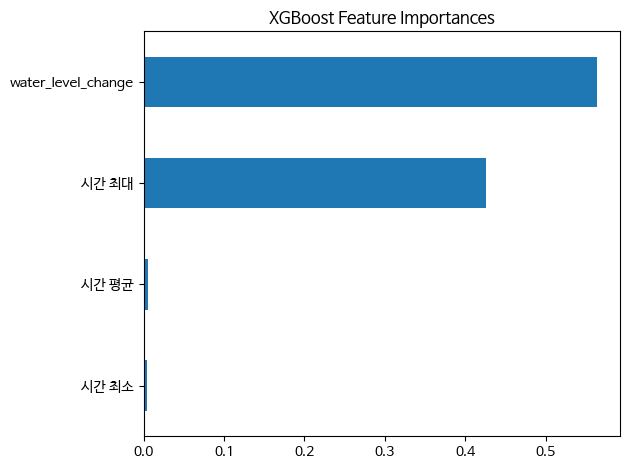

In [78]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# (1) Feature 및 Target 정의
feature_cols = ['시간 최대', '시간 최소', '시간 평균', 'water_level_change']
target_col = 'flood_risk_label'

X = merged_data[feature_cols].copy()
y = merged_data[target_col]

# (2) 결측치 처리
X['water_level_change'] = X['water_level_change'].fillna(X['water_level_change'].mean())

# (3) 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# (4) 모델 학습 - XGBoost
model = XGBClassifier(
    n_estimators=100,
    max_depth=4,
    learning_rate=0.1,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)
model.fit(X_train, y_train)

# (5) 예측 및 평가
y_pred = model.predict(X_test)

print("✅ Accuracy:", round(accuracy_score(y_test, y_pred), 4))
print("\n✅ Classification Report:")
print(classification_report(y_test, y_pred))

print("✅ Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# (6) Feature Importance 확인
import matplotlib.pyplot as plt

feature_importances = model.feature_importances_
feature_importances_series = pd.Series(feature_importances, index=X.columns).sort_values(ascending=False)

print("\n✅ Feature Importances:")
print(feature_importances_series)

# 시각화
feature_importances_series.plot(kind='barh', title='XGBoost Feature Importances')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# 강수량 데이터 추가!!

In [79]:
rainfall_data = pd.read_csv('/content/rainfall_data.csv')
rainfall_data

,날짜,지점,강수량(mm)
0,2021-06-01,140,0.0
1,2021-06-02,140,0.0
2,2021-06-03,140,17.5
3,2021-06-04,140,0.2
4,2021-06-05,140,0.0
...,...,...,...
483,2024-09-26,140,0.0
484,2024-09-27,140,0.0
485,2024-09-28,140,0.0
486,2024-09-29,140,0.0


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [08:09:36] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


✅ Accuracy: 0.9966

✅ Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       136
           1       1.00      0.99      1.00       157

    accuracy                           1.00       293
   macro avg       1.00      1.00      1.00       293
weighted avg       1.00      1.00      1.00       293

✅ Confusion Matrix:
[[136   0]
 [  1 156]]

✅ Feature Importances:
water_level_change    0.568402
시간 최대                 0.420377
시간 평균                 0.005138
시간 최소                 0.004905
강수량(mm)               0.001178
dtype: float32


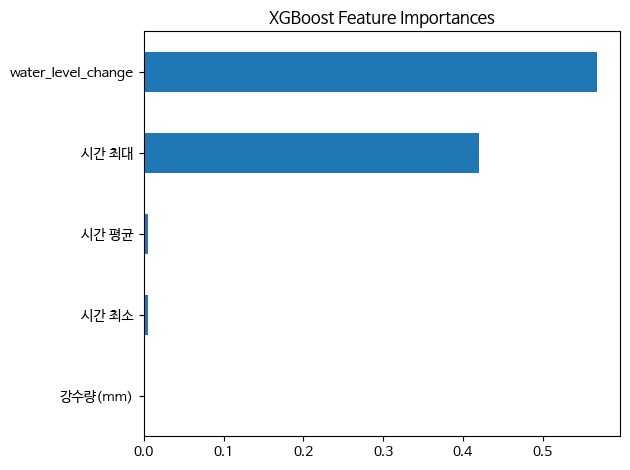

In [80]:
# Convert '날짜' to datetime
rainfall_data['datetime'] = pd.to_datetime(rainfall_data['날짜'])

# Merge with existing data
merged_data_with_rainfall = pd.merge(merged_data, rainfall_data[['datetime', '강수량(mm)']], on='datetime', how='left')

# Fill missing rainfall values, e.g., with 0
merged_data_with_rainfall['강수량(mm)'] = merged_data_with_rainfall['강수량(mm)'].fillna(0)


# (1) Feature 및 Target 정의
feature_cols = ['시간 최대', '시간 최소', '시간 평균', 'water_level_change', '강수량(mm)']
target_col = 'flood_risk_label'

X = merged_data_with_rainfall[feature_cols].copy()
y = merged_data_with_rainfall[target_col]

# (2) 결측치 처리
X['water_level_change'] = X['water_level_change'].fillna(X['water_level_change'].mean())

# (3) 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# (4) 모델 학습 - XGBoost
model = XGBClassifier(
    n_estimators=100,
    max_depth=4,
    learning_rate=0.1,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)
model.fit(X_train, y_train)

# (5) 예측 및 평가
y_pred = model.predict(X_test)

print("✅ Accuracy:", round(accuracy_score(y_test, y_pred), 4))
print("\n✅ Classification Report:")
print(classification_report(y_test, y_pred))

print("✅ Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# (6) Feature Importance 확인
import matplotlib.pyplot as plt

feature_importances = model.feature_importances_
feature_importances_series = pd.Series(feature_importances, index=X.columns).sort_values(ascending=False)

print("\n✅ Feature Importances:")
print(feature_importances_series)

# 시각화
feature_importances_series.plot(kind='barh', title='XGBoost Feature Importances')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

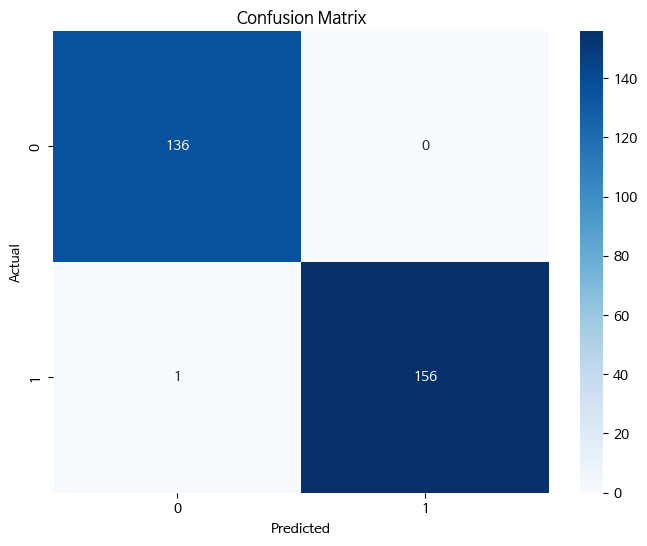

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [82]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import os

# Find the path to a Nanum font file
# This might need to be adjusted based on the exact font installed and its location
font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'

# Check if the font file exists
if os.path.exists(font_path):
    # Add the font to the font manager
    fm.fontManager.addfont(font_path)

    # Set the font to NanumBarunGothic
    plt.rc('font', family='NanumBarunGothic')
    plt.rc('axes', unicode_minus=False)

    print("Matplotlib font settings updated.")
else:
    print(f"Error: Font file not found at {font_path}")

Matplotlib font settings updated.
